In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import statsmodels.api as sm
import pandas as pd

tickerSymbol = 'SPY'

data = pd.read_csv("data_stocks/AAPL.csv")

data.index = pd.to_datetime(data["ts_event"])
data.drop(columns = "ts_event", inplace=True)

#### un an
data = data[(data.index >=  "2021-01-01") & (data.index <  "2024-01-01")]

display(data)



,open,high,low,close,volume
ts_event,,,,,
2021-01-04,133800000000,134430000000,126760000000,129250000000,35408893
2021-01-05,129940000000,131740000000,128320000000,130740000000,19921518
2021-01-06,128190000000,131040000000,126310000000,127370000000,34897192
2021-01-07,127990000000,131625000000,127410000000,130960000000,23925753
2021-01-08,131660000000,132840000000,130230000000,131910000000,22448608
...,...,...,...,...,...
2023-12-22,194500000000,195410000000,192970000000,193590000000,11845160
2023-12-26,193750000000,194130000000,192830000000,192940000000,9127535
2023-12-27,193000000000,193495000000,191095000000,193160000000,13822344


  0%|          | 0/453 [00:00<?, ?it/s]

100%|██████████| 453/453 [06:16<00:00,  1.20it/s]


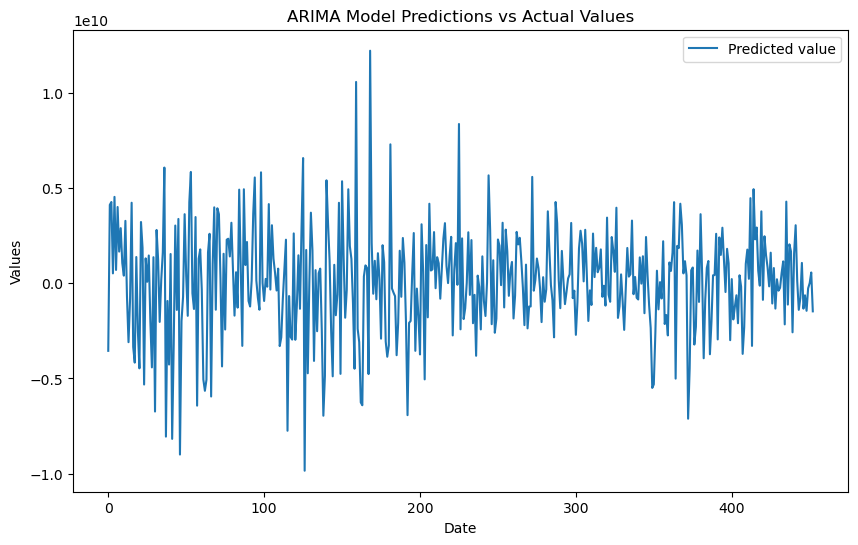

0.9766045690827116
7.914003517473859e+18


In [3]:
import matplotlib.pyplot as plt
import pmdarima as pm
import numpy as np
from sklearn.metrics import r2_score  as r2
from sklearn.metrics import mean_squared_error as mse
import tqdm

trainWindow = 300
# ARIMA
ts = data['close'].to_numpy()


ytrue = ts[trainWindow:]
ypred = []
index = [i for i in range(len(ytrue))]

p = []
d = []
q = []

for i in tqdm.tqdm(range(len(ytrue))):
    trainSet = ts[i:i+trainWindow]
    model = pm.auto_arima(trainSet)
    ypred.append(model.predict(n_periods = 1)[0])
    p.append(model.order[0])
    d.append(model.order[1])
    q.append(model.order[2])

orders = pd.DataFrame()
orders["p"] = p
orders["d"] = d
orders["q"] = q







    


# Plotting the results
plt.figure(figsize=(10, 6))
#plt.plot(index, ytrue, label='Reel value')
#plt.plot(index, ypred, label='Predicted value')
plt.plot(index, np.subtract(ytrue,ypred), label='Predicted value')
plt.title('ARIMA Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

print(r2(ytrue,ypred))
print(mse(ytrue,ypred))

In [11]:
orders

,p,d,q
0,0,1,0
1,0,1,0
2,2,1,2
3,0,1,0
4,0,1,0
...,...,...,...
448,2,1,2
449,2,1,2
450,2,1,2
451,2,1,2


  3%|▎         | 1/35 [06:16<3:33:22, 376.53s/it]/Users/alex/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,0)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/alex/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/alex/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/Users/alex/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/alex/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/Users/alex/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespa

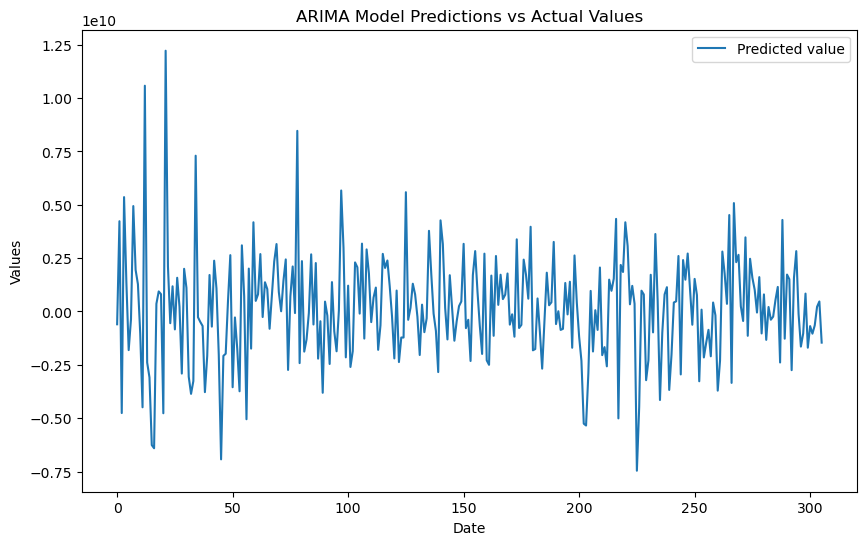

0.9834291198465444
6.372061023864805e+18


In [ ]:
import matplotlib.pyplot as plt
import pmdarima as pm
import numpy as np
from sklearn.metrics import r2_score  as r2
from sklearn.metrics import mean_squared_error as mse
import tqdm


# ARIMA
ts = data['close'].to_numpy()
errors = []
window = []

for trainWindow in tqdm.tqdm(range(25,200,5)):

    ytrue = ts[trainWindow:]
    ypred = []
    index = [i for i in range(len(ytrue))]

    for i in range(len(ytrue)):
        trainSet = ts[i:i+trainWindow]
        model = pm.auto_arima(trainSet)
        ypred.append(model.predict(n_periods = 1)[0])

    errors.append(mse(ytrue,ypred))
    window.append(trainWindow)

res = pd.DataFrame()
res["TrainingWindow"] = window
res["MSE"] = errors

res.to_csv("MSE_1d_pred_ARIMA.csv")
    


# Plotting the results
plt.figure(figsize=(10, 6))
#plt.plot(index, ytrue, label='Reel value')
#plt.plot(index, ypred, label='Predicted value')
plt.plot(index, np.subtract(ytrue,ypred), label='Predicted value')
plt.title('ARIMA Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

print(r2(ytrue,ypred))
print(mse(ytrue,ypred))

In [8]:
model.order[0]

2

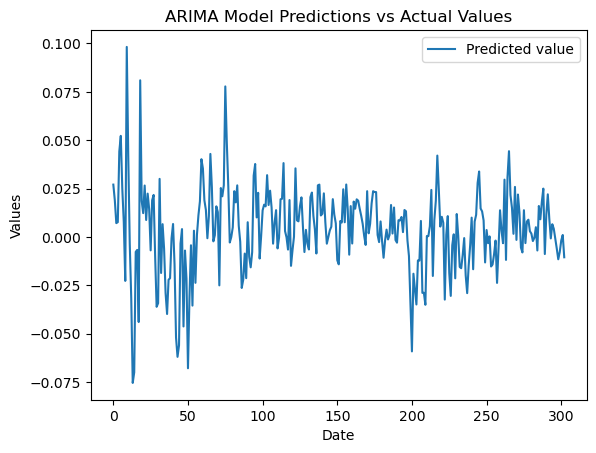

In [4]:
plt.plot(index, np.divide(ytrue,ypred) - 1, label='Predicted value')
plt.title('ARIMA Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [3]:
pd.read_csv("MSE_1d_pred_ARIMA.csv")

,Unnamed: 0,TrainingWindow,MSE
0,0,25,8.782699e+18
1,1,30,8.850299e+18
2,2,35,9.249597e+18
3,3,40,8.654747e+18
4,4,45,8.900466e+18
5,5,50,8.987496e+18
6,6,55,9.047565e+18
7,7,60,8.946232e+18
8,8,65,8.483597e+18
9,9,70,8.583467e+18
